# Math 466 Spring 2025

## Lec 17. Demo: Spectral convergence


---
Author: Xiuyuan Cheng


This file has demo codes of 

- Spectral embedding and spectral convergence


and with varying perplexity parameters


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

###  Spectral embedding

In this example, we sample data points on a continuous closed curve in 3D, and demonstrate the spectral embedding.

We use sklearn spectral embedding, more can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html#sklearn.manifold.SpectralEmbedding).

In [8]:
# generate a curve in 3D
np.random.seed(2021)

nt = 500

tt = np.linspace(0, 1, nt) #this is even grid
# tt = np.random.rand(nt)*(2*np.pi) # random iid points 
tt = tt*2*np.pi
# tt = (tt-0.5)*10
# tt = (2*np.pi+0.1)/(1+np.exp(tt))
tt = np.sort(tt)

rho = 1+0.5*np.sin(tt)

y = tt
X = np.transpose(np.concatenate( ( [np.multiply(rho, np.cos(4*tt))],
                                  [np.multiply(rho, np.sin(4*tt))],
                                  [np.cos(tt)],
                                 ), axis=0 ))

data=X
labels=y


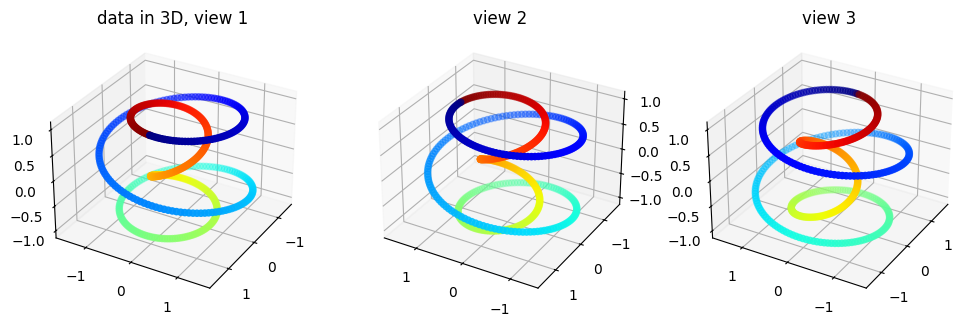

In [9]:
# plot the data colored by class labels
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, cmap='jet')
ax.set_title("data in 3D, view 1")
ax.view_init(30, 30)

ax = fig.add_subplot(132, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, cmap='jet')
ax.set_title("view 2")
ax.view_init(30, 120)

ax = fig.add_subplot(133, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, cmap='jet')
ax.set_title("view 3")
ax.view_init(30, 210)

plt.show()

In [10]:
from sklearn.manifold import SpectralEmbedding

random_state = 2021
# kNN graph
# output_se = SpectralEmbedding( affinity= 'nearest_neighbors',
#                                n_components= 5,
#                                n_neighbors= 10, 
#                             random_state= random_state).fit(data)
output_se = SpectralEmbedding( affinity= 'rbf',
                               gamma=20,
                               n_components= 5,
                            random_state= random_state).fit(data)

In [11]:
output_se.embedding_

array([[-0.0021914 ,  0.02077431, -0.02034172,  0.01710484,  0.02398718],
       [-0.00200658,  0.02098128, -0.0207054 ,  0.01687933,  0.02397199],
       [-0.00180979,  0.02119595, -0.02107722,  0.01662661,  0.02391751],
       ...,
       [-0.00255785,  0.02034741, -0.0195764 ,  0.01751462,  0.0239053 ],
       [-0.00237259,  0.02056592, -0.01997044,  0.01731356,  0.02396488],
       [-0.0021914 ,  0.02077431, -0.02034172,  0.01710484,  0.02398718]])

Text(0.5, 1.0, ' psi2, psi3')

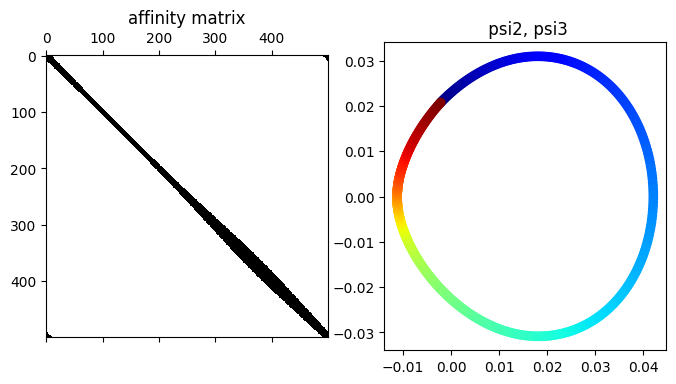

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.spy(output_se.affinity_matrix_>0.01)
plt.title('affinity matrix')
plt.subplot(1,2,2)
plt.scatter(output_se.embedding_[:, 0], output_se.embedding_[:, 1], c=labels, cmap='jet')
plt.title(' psi2, psi3')



Text(0.5, 1.0, 'psi5')

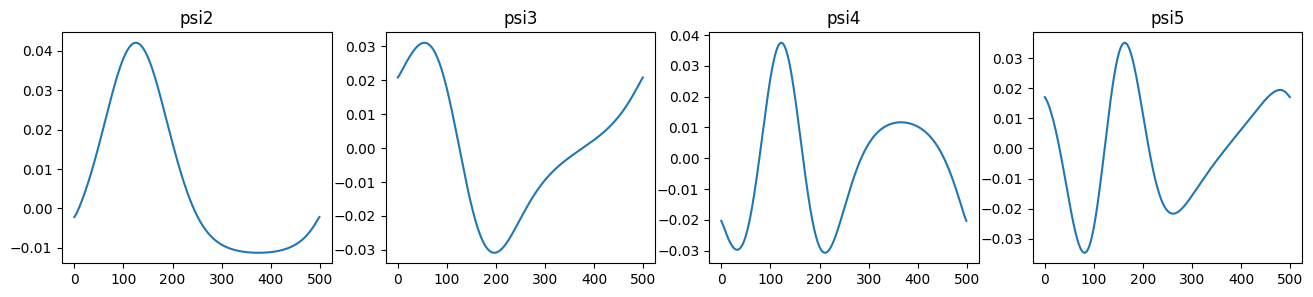

In [13]:

plt.figure(figsize=(16, 3))

plt.subplot(1,4,1)
plt.plot(output_se.embedding_[:, 0])
plt.title('psi2')
plt.subplot(1,4,2)
plt.plot(output_se.embedding_[:, 1])
plt.title('psi3')
plt.subplot(1,4,3)
plt.plot(output_se.embedding_[:, 2])
plt.title('psi4')
plt.subplot(1,4,4)
plt.plot(output_se.embedding_[:, 3])
plt.title('psi5')



We now show the convergence of the embedding when number of samples increases.


Text(0.5, 1.0, 'psi5')

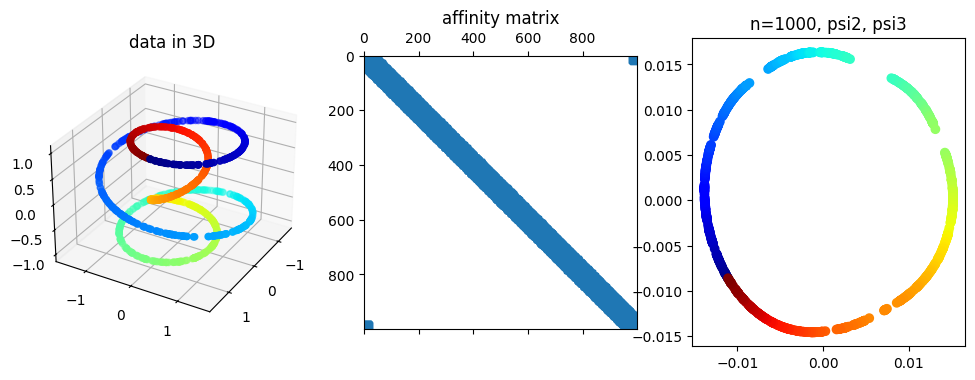

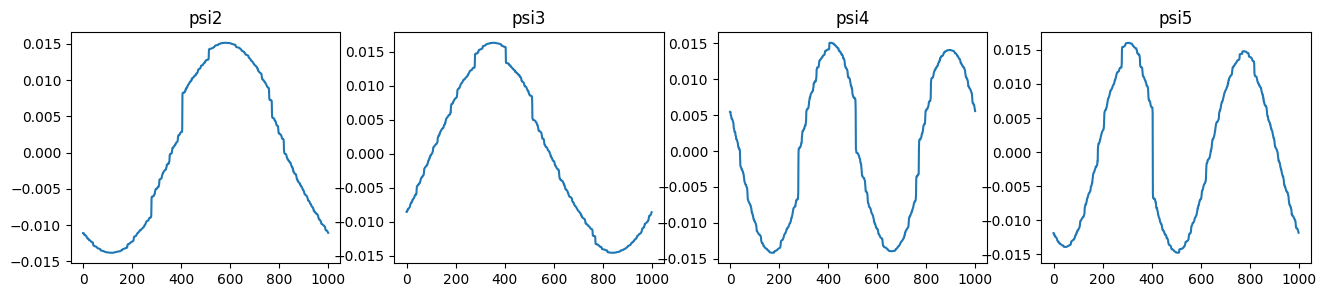

In [14]:
# generate data
nt = 1000
n_neighbors= 10

np.random.seed(2021)
tt = np.random.rand(nt)*(2*np.pi)
tt = np.sort(tt)
rho = 1+0.5*np.sin(tt)
y = tt
X = np.transpose(np.concatenate( ( [np.multiply(rho, np.cos(4*tt))],
                                  [np.multiply(rho, np.sin(4*tt))],
                                  [np.cos(tt)],
                                 ), axis=0 ))
data=X
labels=y



# kNN graph spectral embedding
output_se = SpectralEmbedding( affinity= 'nearest_neighbors',
                               n_components= 5,
                               n_neighbors= n_neighbors, 
                            random_state= random_state).fit(data)

#
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:,2], c=labels, cmap='jet')
ax.set_title("data in 3D")
ax.view_init(30, 30)
plt.subplot(1,3,2)
plt.spy(output_se.affinity_matrix_)
plt.title('affinity matrix')
plt.subplot(1,3,3)
plt.scatter(output_se.embedding_[:, 0], output_se.embedding_[:, 1], c=labels, cmap='jet')
plt.title('n=1000, psi2, psi3')



plt.figure(figsize=(16, 3))
plt.subplot(1,4,1)
plt.plot(output_se.embedding_[:, 0])
plt.title('psi2')
plt.subplot(1,4,2)
plt.plot(output_se.embedding_[:, 1])
plt.title('psi3')
plt.subplot(1,4,3)
plt.plot(output_se.embedding_[:, 2])
plt.title('psi4')
plt.subplot(1,4,4)
plt.plot(output_se.embedding_[:, 3])
plt.title('psi5')



Text(0.5, 1.0, 'psi5')

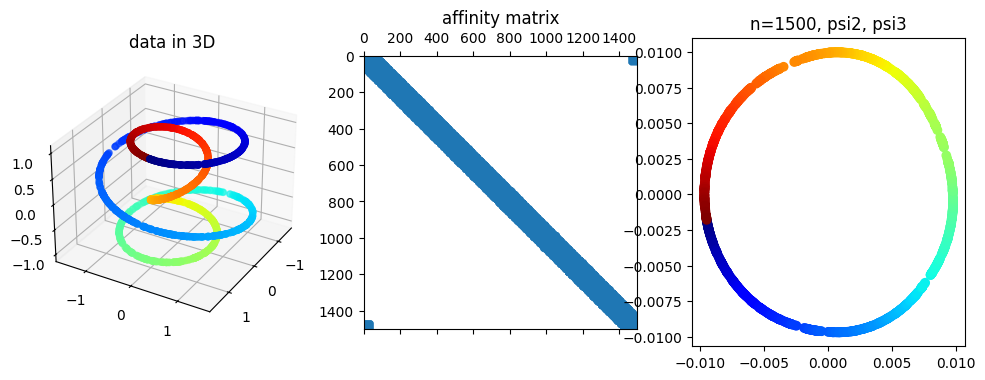

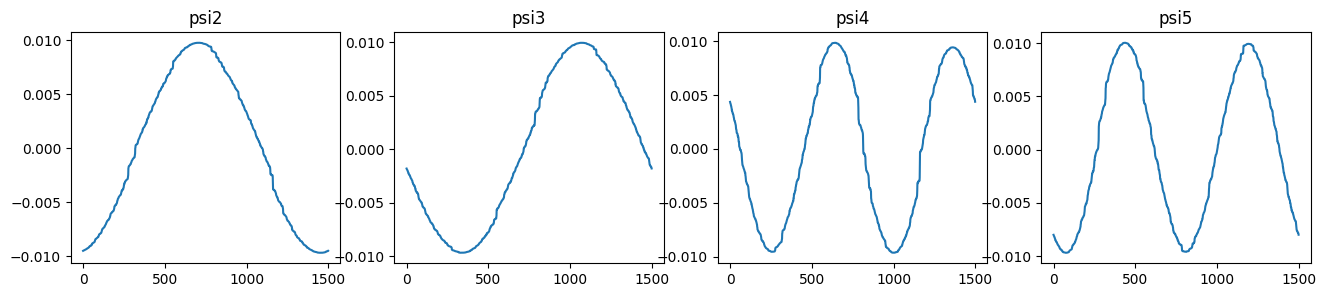

In [15]:
# converge to sin and cos in eigenvectors


# n = 1500

# generate data
nt = 1500
n_neighbors= 15

np.random.seed(2021)
tt = np.random.rand(nt)*(2*np.pi)
tt = np.sort(tt)
rho = 1+0.5*np.sin(tt)
y = tt
X = np.transpose(np.concatenate( ( [np.multiply(rho, np.cos(4*tt))],
                                  [np.multiply(rho, np.sin(4*tt))],
                                  [np.cos(tt)],
                                 ), axis=0 ))
data=X
labels=y

# kNN graph spectral embedding
output_se = SpectralEmbedding( affinity= 'nearest_neighbors',
                               n_components= 5,
                               n_neighbors= n_neighbors, 
                            random_state= random_state).fit(data)


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:,2], c=labels, cmap='jet')
ax.set_title("data in 3D")
ax.view_init(30, 30)
plt.subplot(1,3,2)
plt.spy(output_se.affinity_matrix_)
plt.title('affinity matrix')
plt.subplot(1,3,3)
plt.scatter(output_se.embedding_[:, 0], output_se.embedding_[:, 1], c=labels, cmap='jet')
plt.title('n=1500, psi2, psi3')



plt.figure(figsize=(16, 3))
plt.subplot(1,4,1)
plt.plot(output_se.embedding_[:, 0])
plt.title('psi2')
plt.subplot(1,4,2)
plt.plot(output_se.embedding_[:, 1])
plt.title('psi3')
plt.subplot(1,4,3)
plt.plot(output_se.embedding_[:, 2])
plt.title('psi4')
plt.subplot(1,4,4)
plt.plot(output_se.embedding_[:, 3])
plt.title('psi5')




Text(0.5, 1.0, 'psi5')

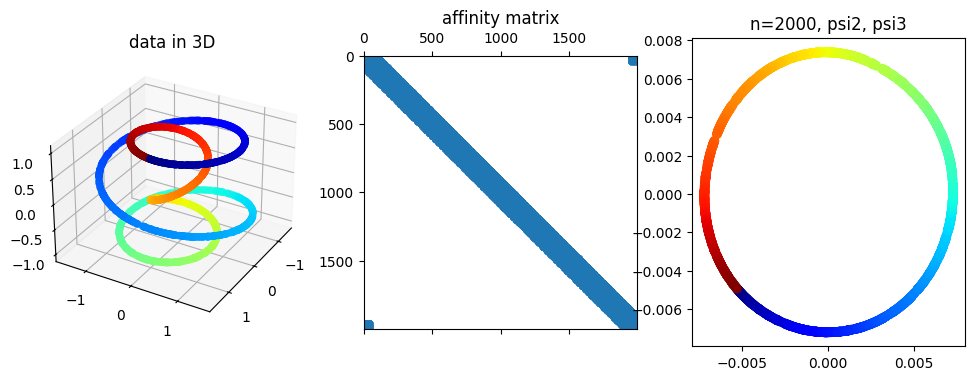

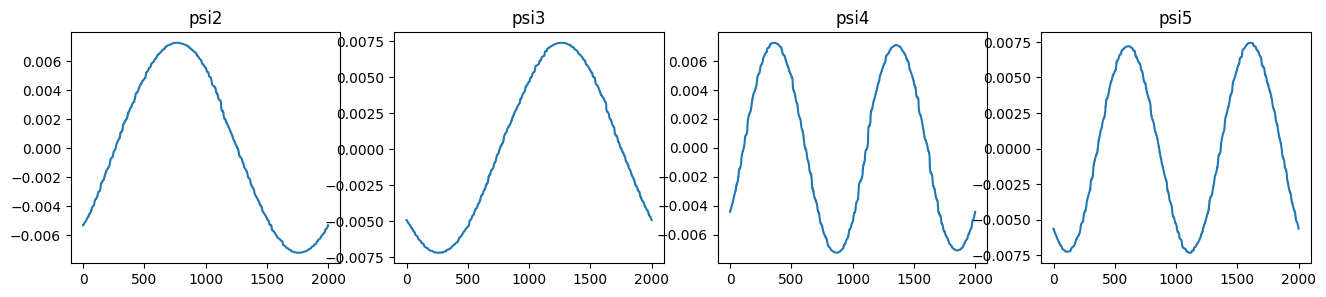

In [16]:
# n = 2000

# generate data
nt = 2000
n_neighbors= 20

np.random.seed(2021)
tt = np.random.rand(nt)*(2*np.pi)
tt = np.sort(tt)
rho = 1+0.5*np.sin(tt)
y = tt
X = np.transpose(np.concatenate( ( [np.multiply(rho, np.cos(4*tt))],
                                  [np.multiply(rho, np.sin(4*tt))],
                                  [np.cos(tt)],
                                 ), axis=0 ))
data=X
labels=y

# kNN graph spectral embedding
output_se = SpectralEmbedding( affinity= 'nearest_neighbors',
                               n_components= 5,
                               n_neighbors= n_neighbors, 
                            random_state= random_state).fit(data)


fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:,2], c=labels, cmap='jet')
ax.set_title("data in 3D")
ax.view_init(30, 30)
plt.subplot(1,3,2)
plt.spy(output_se.affinity_matrix_)
plt.title('affinity matrix')
plt.subplot(1,3,3)
plt.scatter(output_se.embedding_[:, 0], output_se.embedding_[:, 1], c=labels, cmap='jet')
plt.title('n=2000, psi2, psi3')



plt.figure(figsize=(16, 3))
plt.subplot(1,4,1)
plt.plot(output_se.embedding_[:, 0])
plt.title('psi2')
plt.subplot(1,4,2)
plt.plot(output_se.embedding_[:, 1])
plt.title('psi3')
plt.subplot(1,4,3)
plt.plot(output_se.embedding_[:, 2])
plt.title('psi4')
plt.subplot(1,4,4)
plt.plot(output_se.embedding_[:, 3])
plt.title('psi5')



In [17]:
output_se.n_components

5